In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
4187,5143,spam,Subject: thank god hes gone\r\ncome and checko...,1
1519,652,ham,Subject: well head\r\nhere is the list of mete...,0
781,3216,ham,"Subject: re : chevron phillips chemical co . ,...",0
2426,3024,ham,"Subject: hpl nom for april , 2001\r\n( see att...",0
3878,2001,ham,"Subject: enron / hpl actuals - nov . 7 , 2000\...",0


In [4]:
df.shape

(5171, 4)

# 1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df.drop(columns =['Unnamed: 0'], inplace = True) # drop 0th column

In [7]:
df.sample(5)

,label,text,label_num
2262,spam,"Subject: quailty web solutions , involutory\r\...",1
4650,ham,Subject: beaumont methanol - meter 1428 - octo...,0
5157,ham,Subject: 5 th changes @ duke and air liquide\r...,0
4770,ham,"Subject: revised nominations\r\ndaren ,\r\nwe ...",0
67,ham,Subject: resume - anna cola\r\nanna cola is th...,0


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['label'] = encoder.fit_transform(df['label'])

In [10]:
df.head()

,label,text,label_num
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,1,"Subject: photoshop , windows , office . cheap ...",1
4,0,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df.isnull().sum() # missing values

label        0
text         0
label_num    0
dtype: int64

In [12]:
df.duplicated().sum() # checking duplicate values

178

In [13]:
df = df.drop_duplicates(keep='first') # remove duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(4993, 3)

# 2. Exploratory Data Analysis

In [16]:
df.head()

,label,text,label_num
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,1,"Subject: photoshop , windows , office . cheap ...",1
4,0,Subject: re : indian springs\r\nthis deal is t...,0


In [17]:
df['label'].value_counts()

0    3531
1    1462
Name: label, dtype: int64

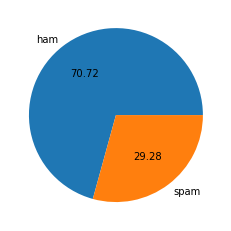

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk # Natural Language Toolkit Library 

In [20]:
nltk.download('punkt') #!pip install nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len) # Counting number of characters

In [22]:
df.head()

,label,text,label_num,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [23]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # Fetching number of words

In [24]:
df.head()

,label,text,label_num,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,label,text,label_num,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.305628
std,1547.863387,340.702932,26.887339
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [28]:
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe() # ham messages

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [29]:
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe() # spam messages

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.274282
std,1840.112883,349.439381,29.960218
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,577.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

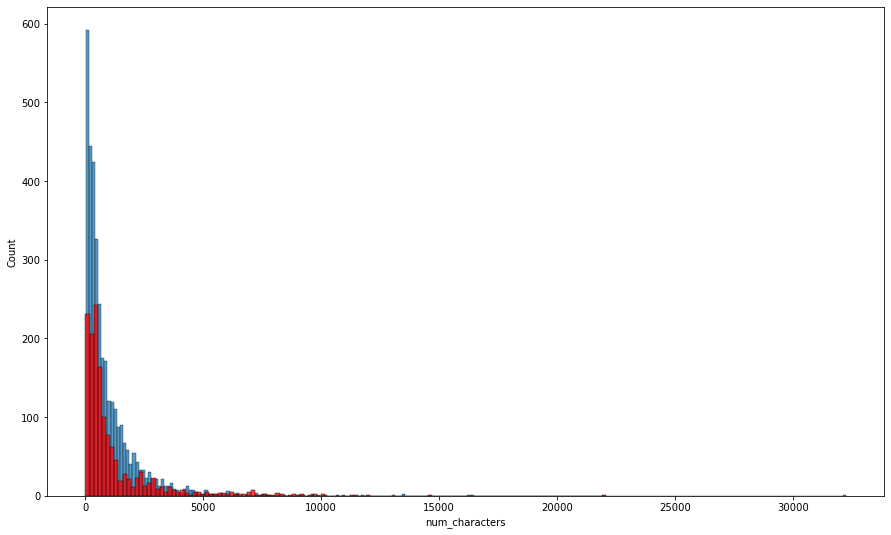

In [31]:
plt.figure(figsize=(15,9))
sns.histplot(df[df['label'] == 0] ['num_characters'])
sns.histplot(df[df['label'] == 1] ['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

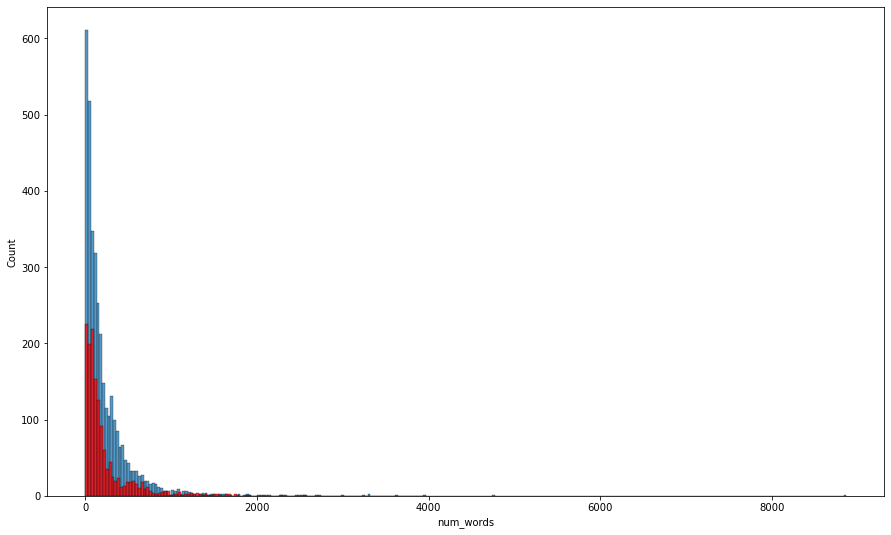

In [32]:
plt.figure(figsize=(15,9))
sns.histplot(df[df['label'] == 0] ['num_words'])
sns.histplot(df[df['label'] == 1] ['num_words'],color='red')

C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sharv\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


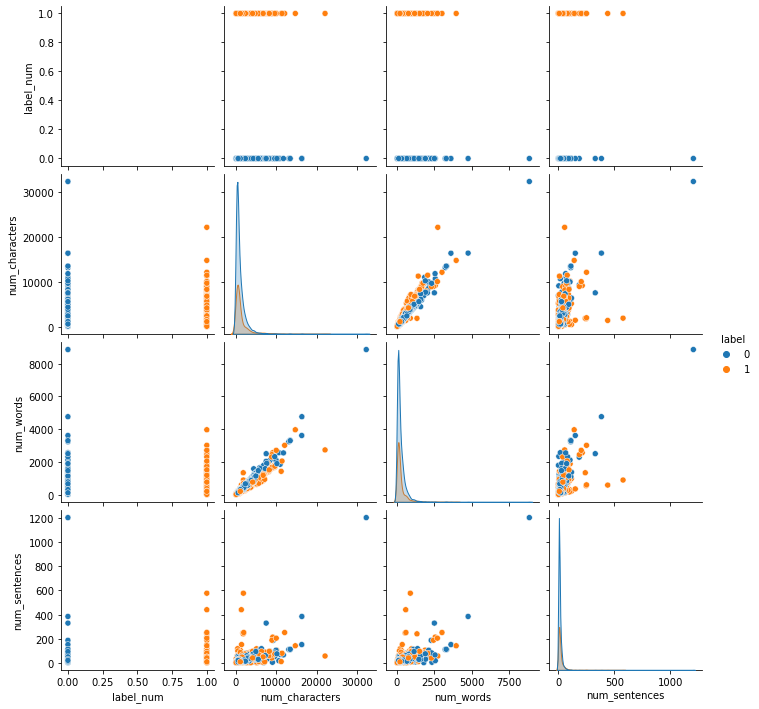

In [33]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

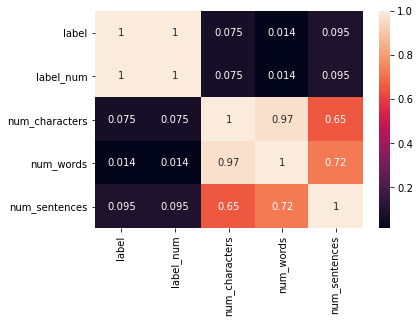

In [34]:
sns.heatmap(df.corr(),annot=True)

# 3. Data / Text Preprocessing

In [35]:
def transform_text(text):
    text = text.lower() # Lower Case
    text = nltk.word_tokenize(text) # Tokenization
    
    y = [] # Removing Special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # Removing Stop Words and Punctuation 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # Stemming
        y.append(ps.stem(i))
   

    return " ".join(y)

In [36]:
import nltk # Importing nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Painting')

'paint'

In [40]:
transform_text("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [41]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
conda install -c conda-forge wordcloud # Importing wordcloud

In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" ")) # ham messages

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" ")) # spam messages

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = [] # spam messages
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
spam_corpus

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
Counter(spam_corpus)

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(50)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = [] # ham messages
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
ham_corpus

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
Counter(ham_corpus)

In [ ]:
from collections import Counter
Counter(ham_corpus).most_common(50)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(50))

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [ ]:
# Text Vectorization
# Using Bag of Words

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X

In [ ]:
X.shape

In [ ]:
y = df['label'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
conda install -c anaconda py-xgboost

In [ ]:
# tfidf ---> MNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
clf = LogisticRegression(C=0.01, penalty='l1',solver='liblinear');

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue ='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of Tfidf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))